# Inflation Rate Laffer Curves  

## Overview

We study stationary and dynamic *Laffer curves* in the inflation tax rate in a non-linear version of the model studied in {doc}`money_inflation`.

We use the log-linear version of the demand function for money that  {cite}`Cagan`
used in his classic paper in place of the linear demand function used in {doc}`money_inflation`. 

That change requires that we modify parts of our analysis.

In particular, our dynamic system is no longer linear in state variables. 

Nevertheless, the economic logic underlying an  analysis based on what we called ''method 2''  remains unchanged.  

We shall discover qualitatively similar outcomes to those that we studied  in {doc}`money_inflation`.

That lecture presented a linear version of the model in this lecture.  

As in that  lecture,  we discussed these topics:

* an **inflation tax** that a government gathers by printing paper or electronic money
* a dynamic **Laffer curve** in the inflation tax rate that has two stationary equilibria
* perverse dynamics under rational expectations in which the system converges to the higher stationary inflation tax rate
* a peculiar comparative stationary-state analysis connected with that stationary inflation rate that asserts that inflation can be *reduced* by running *higher*  government deficits 

These outcomes will set the stage for the analysis of {doc}`laffer_adaptive` that studies a version of the present model that  uses a version of "adaptive expectations" instead of rational expectations.

That lecture will show that 

* replacing rational expectations with adaptive expectations leaves the two stationary inflation rates unchanged, but that $\ldots$ 
* it reverses the perverse dynamics by making the *lower* stationary inflation rate the one to which the system typically converges
* a more plausible comparative dynamic outcome emerges in which now inflation can be *reduced* by running *lower*  government deficits

## The Model

Let  

* $m_t$ be the log of the money supply at the beginning of time $t$
* $p_t$ be the log of the price level at time $t$
  
The demand function for money is 

$$
m_{t+1} - p_t = -\alpha (p_{t+1} - p_t) 
$$ (eq:mdemand)

where $\alpha \geq 0$.  

The law of motion of the money supply is

$$ 
\exp(m_{t+1}) - \exp(m_t) = g \exp(p_t) 
$$ (eq:msupply)

where $g$ is the part of government expenditures financed by printing money.

**Remark:** Please notice that while equation {eq}`eq:mdemand` is linear in logs of the money supply and price level, equation {eq}`eq:msupply` is linear in levels. This will require adapting the equilibrium computation methods that we deployed in {doc}`money_inflation`.



## Limiting Values of Inflation Rate

We can compute the two prospective limiting values for $\overline \pi$ by studying the steady-state Laffer curve.

Thus, in a  *steady state* 

$$
m_{t+1} - m_t = p_{t+1} - p_t =  x \quad \forall t ,
$$

where $x > 0 $ is a common rate of growth of logarithms of the money supply and price level.

A few lines of algebra yields the following equation that $x$ satisfies

$$
\exp(-\alpha x) - \exp(-(1 + \alpha) x) = g 
$$ (eq:steadypi)

where we require that

$$
g \leq \max_{x \geq 0} \{\exp(-\alpha x) - \exp(-(1 + \alpha) x) \},  
$$ (eq:revmax)

so that it is feasible to finance $g$ by printing money.

The left side of {eq}`eq:steadypi` is steady state revenue raised by printing money.

The right side of {eq}`eq:steadypi` is the quantity  of time $t$ goods  that the government raises by printing money. 

Soon  we'll plot  the left and right sides of equation {eq}`eq:steadypi`.

But first we'll write code that computes a steady-state
$\overline \pi$.

Let's start by importing some  libraries

In [1]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.optimize import fsolve 

Let's create a `namedtuple` to store the parameters of the model

In [2]:
CaganLaffer = namedtuple('CaganLaffer', 
                        ["m0",  # log of the money supply at t=0
                         "α",   # sensitivity of money demand
                         "λ",
                         "g" ])

# Create a Cagan Laffer model
def create_model(α=0.5, m0=np.log(100), g=0.35):
    return CaganLaffer(α=α, m0=m0, λ=α/(1+α), g=g)

model = create_model()

Now we write code that computes steady-state $\overline \pi$s.

In [3]:
# Define formula for π_bar
def solve_π(x, α, g):
    return np.exp(-α * x) - np.exp(-(1 + α) * x) - g

def solve_π_bar(model, x0):
    π_bar = fsolve(solve_π, x0=x0, xtol=1e-10, args=(model.α, model.g))[0]
    return π_bar

# Solve for the two steady state of π
π_l = solve_π_bar(model, x0=0.6)
π_u = solve_π_bar(model, x0=3.0)
print(f'The two steady state of π are: {π_l, π_u}')

The two steady state of π are: (0.6737147075333032, 1.6930797322614812)


We find two steady state $\overline \pi$ values.

## Steady State Laffer curve

The following figure plots the steady state Laffer curve together with the two stationary inflation rates.

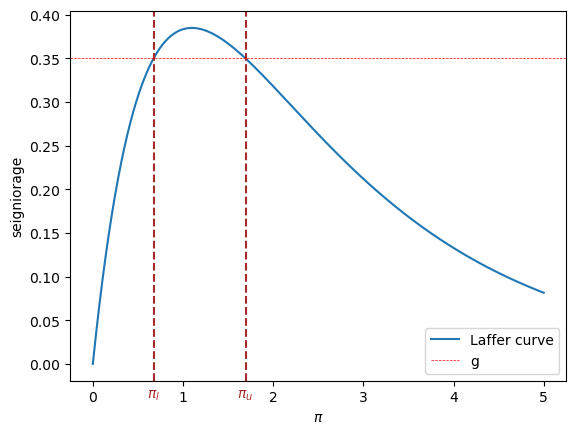

In [4]:
def compute_seign(x, α):
    return np.exp(-α * x) - np.exp(-(1 + α) * x) 

def plot_laffer(model, πs):
    α, g = model.α, model.g
    
    # Generate π values
    x_values = np.linspace(0, 5, 1000)

    # Compute corresponding seigniorage values for the function
    y_values = compute_seign(x_values, α)

    # Plot the function
    plt.plot(x_values, y_values, 
            label=f'Laffer curve')
    for π, label in zip(πs, ['$\pi_l$', '$\pi_u$']):
        plt.text(π, plt.gca().get_ylim()[0]*2, 
                 label, horizontalalignment='center',
                 color='brown', size=10)
        plt.axvline(π, color='brown', linestyle='--')
    plt.axhline(g, color='red', linewidth=0.5, 
                linestyle='--', label='g')
    plt.xlabel('$\pi$')
    plt.ylabel('seigniorage')
    plt.legend()
    plt.show()

# Steady state Laffer curve
plot_laffer(model, (π_l, π_u))

## Initial Price Levels

Now that we have our hands on the two possible steady states, we can compute two functions  $\underline p(m_0)$ and
$\overline p(m_0)$, which as initial conditions for $p_t$ at time $t$, imply that $\pi_t = \overline \pi $ for all $t \geq 0$.

The function $\underline p(m_0)$ will be associated with $\pi_l$ the lower steady-state inflation rate.

The function $\overline p(m_0)$ will be associated with $\pi_u$ the lower steady-state inflation rate.

In [5]:
def solve_p0(p0, m0, α, g, π):
    return np.log(np.exp(m0) + g * np.exp(p0)) + α * π - p0

def solve_p0_bar(model, x0, π_bar):
    p0_bar = fsolve(solve_p0, x0=x0, xtol=1e-20, args=(model.m0, 
                                                       model.α, 
                                                       model.g, 
                                                       π_bar))[0]
    return p0_bar

# Compute two initial price levels associated with π_l and π_u
p0_l = solve_p0_bar(model, 
                    x0=np.log(220), 
                    π_bar=π_l)
p0_u = solve_p0_bar(model, 
                    x0=np.log(220), 
                    π_bar=π_u)
print(f'Associated initial  p_0s  are: {p0_l, p0_u}')

Associated initial  p_0s  are: (5.615742247288047, 7.144789784380314)


### Verification 

To start, let's write some code to verify that if the initial log price level $p_0$ takes one
of the two values we just calculated, the inflation rate $\pi_t$ will be constant for all $t \geq 0$.

The following code verifies this.

In [6]:
# Implement pseudo-code above
def simulate_seq(p0, model, num_steps):
    λ, g = model.λ, model.g
    π_seq, μ_seq, m_seq, p_seq = [], [], [model.m0], [p0]

    for t in range(num_steps):
        
        m_seq.append(np.log(np.exp(m_seq[t]) + g * np.exp(p_seq[t])))
        p_seq.append(1/λ * p_seq[t] + (1 - 1/λ) * m_seq[t+1])

        μ_seq.append(m_seq[t+1]-m_seq[t])
        π_seq.append(p_seq[t+1]-p_seq[t])

    return π_seq, μ_seq, m_seq, p_seq

In [7]:
π_seq, μ_seq, m_seq, p_seq = simulate_seq(p0_l, model, 150)

# Check π and μ at steady state
print('π_bar == μ_bar:', π_seq[-1] == μ_seq[-1])

# Check steady state m_{t+1} - m_t and p_{t+1} - p_t 
print('m_{t+1} - m_t:', m_seq[-1] - m_seq[-2])
print('p_{t+1} - p_t:', p_seq[-1] - p_seq[-2])

# Check if exp(-αx) - exp(-(1 + α)x) = g
eq_g = lambda x: np.exp(-model.α * x) - np.exp(-(1 + model.α) * x)

print('eq_g == g:', np.isclose(eq_g(m_seq[-1] - m_seq[-2]), model.g))

π_bar == μ_bar: True
m_{t+1} - m_t: 1.693079732261424
p_{t+1} - p_t: 1.693079732261424
eq_g == g: True


## Computing an Equilibrium Sequence 

We'll deploy a method similar to *Method 2* used in {doc}`money_inflation`.  

We'll take the time $t$ state vector to be the pair $(m_t, p_t)$.

We'll treat $m_t$ as a ``natural state variable`` and $p_t$ as a ``jump`` variable.
  
Let

$$
\lambda \equiv \frac{\alpha}{1+ \alpha}
$$

Let's rewrite equation {eq}`eq:mdemand`  as

$$
p_t = (1-\lambda) m_{t+1} + \lambda p_{t+1} 
$$ (eq:mdemand2)

We'll summarize our algorithm with the following pseudo-code.

**Pseudo-code**

The heart of the pseudo-code iterates on the following mapping from state vector $(m_t, p_t)$ at time $t$
to state vector $(m_{t+1}, p_{t+1})$ at time $t+1$.


* starting from a given pair $(m_t, p_t)$ at time $t \geq 0$

  * solve {eq}`eq:msupply` for $m_{t+1}$

  * solve {eq}`eq:mdemand2` for $p_{t+1} = \lambda^{-1} p_t + (1 - \lambda^{-1}) m_{t+1}$

  * compute the inflation rate $\pi_t = p_{t+1} - p_t$ and growth of money supply $\mu_t = m_{t+1} - m_t $

Next,   compute the two functions $\underline p(m_0)$ and $\overline p(m_0)$ described above

Now  initiate the algorithm as follows.

  * set   $m_0 >0$
  * set a value of $p_0 \in [\underline p(m_0), \overline p(m_0)]$  and form the pair  $(m_0, p_0)$ at time $t =0$
  
Starting from $(m_0, p_0)$ iterate on $t$ to convergence of $\pi_t \rightarrow \overline \pi$ and $\mu_t \rightarrow \overline \mu$
  
It will turn out that 

* if they exist, limiting values $\overline \pi$ and $\overline \mu$ will be equal

* if  limiting values exist, there are two possible limiting values, one high, one low

* for almost all initial log price levels $p_0$, the limiting $\overline \pi = \overline \mu$ is 
the higher value

* for each of the two possible limiting values $\overline \pi$ ,there is a unique initial log price level $p_0$ that implies that $\pi_t = \mu_t = \overline \mu$ for all  $t \geq 0$

  * this unique initial log price level solves $\log(\exp(m_0) + g \exp(p_0)) - p_0 = - \alpha \overline \pi $
  
  * the preceding equation for $p_0$ comes from $m_1 - p_0 = -  \alpha \overline \pi$


## Slippery Side of Laffer Curve Dynamics

We are now equipped  to compute  time series starting from different $p_0$ settings, like those in {doc}`money_inflation`.

In [8]:
def draw_iterations(p0s, model, line_params, p0_bars, num_steps):

    fig, axes = plt.subplots(4, 1, figsize=(8, 10), sharex=True)
    
    # Pre-compute time steps
    time_steps = np.arange(num_steps) 
    
    # Plot the first two y-axes in log scale
    for ax in axes[:2]:
        ax.set_yscale('log')

    # Iterate over p_0s and calculate a series of y_t
    for p0 in p0s:
        π_seq, μ_seq, m_seq, p_seq = simulate_seq(p0, model, num_steps)

        # Plot m_t
        axes[0].plot(time_steps, m_seq[1:], **line_params)

        # Plot p_t
        axes[1].plot(time_steps, p_seq[1:], **line_params)
        
        # Plot π_t
        axes[2].plot(time_steps, π_seq, **line_params)
        
        # Plot μ_t
        axes[3].plot(time_steps, μ_seq, **line_params)
    
    # Draw labels
    axes[0].set_ylabel('$m_t$')
    axes[1].set_ylabel('$p_t$')
    axes[2].set_ylabel('$\pi_t$')
    axes[3].set_ylabel('$\mu_t$')
    axes[3].set_xlabel('timestep')
    
    for p_0, label in [(p0_bars[0], '$p_0=p_l$'), (p0_bars[1], '$p_0=p_u$')]:
        y = simulate_seq(p_0, model, 1)[0]
        for ax in axes[2:]:
            ax.axhline(y=y[0], color='grey', linestyle='--', lw=1.5, alpha=0.6)
            ax.text(num_steps * 1.02, y[0], label, verticalalignment='center', 
                         color='grey', size=10)
    
    # Enforce integar axis label
    axes[3].xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

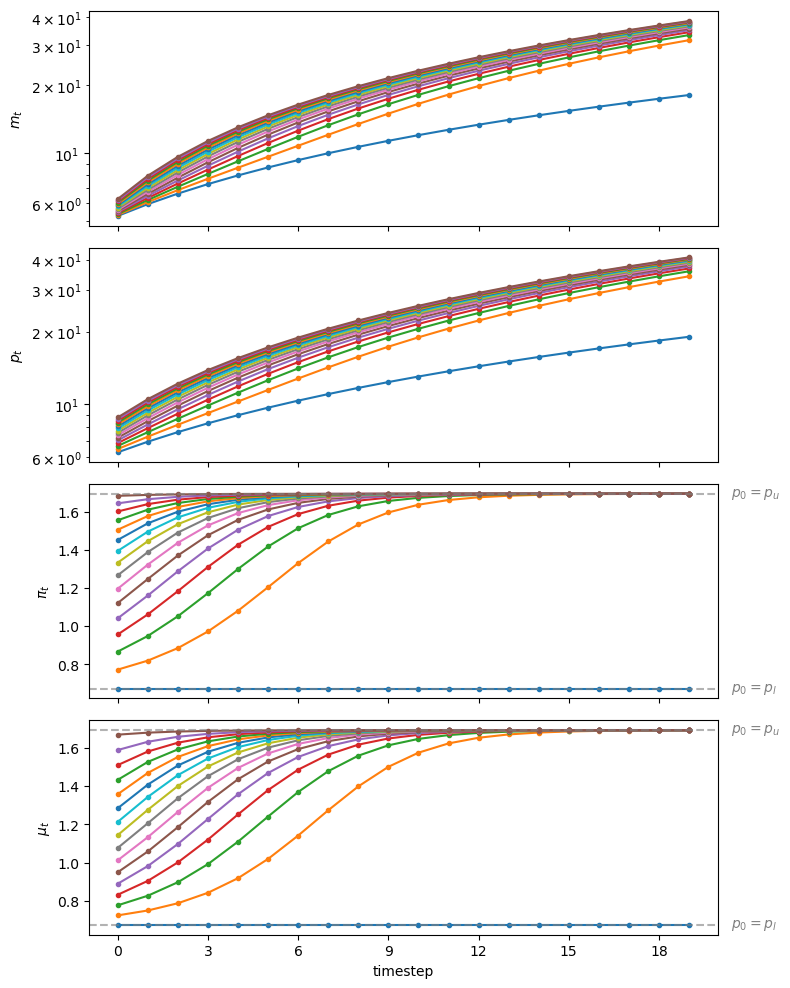

In [9]:
# Generate a sequence from p0_l to p0_u
p0s = np.arange(p0_l, p0_u, 0.1) 

line_params = {'lw': 1.5, 
              'marker': 'o',
              'markersize': 3}

p0_bars = (p0_l, p0_u)
              
draw_iterations(p0s, model, line_params, p0_bars, num_steps=20)

Staring at the paths of price levels in  {numref}`p0_path_nonlin` reveals that almost all paths converge to the *higher* inflation tax rate displayed in the stationary state Laffer curve. displayed in figure  {numref}`laffer_curve_nonlinear`.  

Thus, we have reconfirmed  what we have  called the "perverse" dynamics under rational expectations in which the system converges to the higher of two possible stationary inflation tax rates.

Those dynamics are "perverse" not only in the sense that they imply that the monetary and fiscal authorities that have chosen to finance government expenditures eventually impose a higher inflation tax than required to finance government expenditures, but because of the following "counterintuitive" situation that we can deduce by staring at the stationary state Laffer curve displayed in figure  {numref}`laffer_curve_nonlinear`:

* the figure indicates that inflation can be *reduced* by running *higher*  government deficits, i.e., by raising more resources through  printing money. 

```{note}
The same qualitative outcomes prevail in {doc}`money_inflation` that studies a linear version of the model in this lecture.
```

We discovered that 

* all but one of the equilibrium paths converge to limits in which the higher of two possible stationary inflation tax prevails
* there is a unique equilibrium path associated with "plausible" statements about how reductions in government deficits affect a stationary  inflation rate

As in {doc}`money_inflation`,
on grounds of plausibility, we  again recommend  selecting the unique equilibrium that converges to the lower stationary inflation tax rate. 

As we shall see, we  accepting  this recommendation is a key ingredient of outcomes of the "unpleasant arithmetic" that we describe in {doc}`unpleasant`.

In {doc}`laffer_adaptive`, we shall explore how  {cite}`bruno1990seigniorage` and others justified our equilibrium selection in other ways.